In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
SAMPLE_MIN = 0
SAMPLE_MAX = 15
SAMPLE_RANGE = (SAMPLE_MIN, SAMPLE_MAX)
num_samples = 30


In [3]:
def normal_dist(x: float, mean: float, deviation: float):
    return (1 / (math.sqrt(2 * math.pi) * deviation)) * math.exp(
        -0.5 * (((x - mean) ** 2) / (deviation**2))
    )

def p(x: int):
    return (
        0.3 * normal_dist(x, 2, 1)
        + 0.4 * normal_dist(x, 5, 2)
        + 0.3 * normal_dist(x, 9, 1)
    )


In [4]:
def gen_uniform_samples(sample_max: int=SAMPLE_MAX, k=num_samples, seed=0):
    rng = np.random.default_rng(seed)

    return [rng.random()*sample_max for _ in range(k)]


In [5]:
def resample(samples, k=num_samples):
    target_density = np.array([p(i) for i in samples])  # np arrays allow division
    weights = target_density / samples
    normalized_weights = weights / np.sum(weights)

    return [samples[resampled_idx] for resampled_idx in np.random.choice(np.arange(k), k, replace=True, p=normalized_weights)]


In [6]:

def print_distr(samples, normalize: bool = False):
    int_samples = [round(v) for v in samples]

    distr_dict = {v:0. for v in range(min(int_samples),max(int_samples)+1)}
    for sample in int_samples:
        distr_dict.setdefault(sample, 0)
        distr_dict[sample] += 1

    print(distr_dict)
    if normalize:
        total = sum(distr_dict.values())
        for key in distr_dict:
            distr_dict[key] /= total
        print(distr_dict)

    return distr_dict

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 2.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 0.0, 10: 3.0, 11: 2.0, 12: 1.0, 13: 2.0, 14: 0.0, 15: 2.0}
{0: 0.05, 1: 0.05, 2: 0.05, 3: 0.05, 4: 0.1, 5: 0.05, 6: 0.05, 7: 0.05, 8: 0.05, 9: 0.0, 10: 0.15, 11: 0.1, 12: 0.05, 13: 0.1, 14: 0.0, 15: 0.1}
{0: 3.0, 1: 0.0, 2: 8.0, 3: 0.0, 4: 4.0, 5: 1.0, 6: 0.0, 7: 1.0, 8: 2.0, 9: 0.0, 10: 1.0}
{0: 0.15, 1: 0.0, 2: 0.4, 3: 0.0, 4: 0.2, 5: 0.05, 6: 0.0, 7: 0.05, 8: 0.1, 9: 0.0, 10: 0.05}
{0: 1.0, 1: 5.0, 2: 7.0, 3: 10.0, 4: 5.0, 5: 3.0, 6: 7.0, 7: 6.0, 8: 7.0, 9: 5.0, 10: 7.0, 11: 10.0, 12: 6.0, 13: 7.0, 14: 11.0, 15: 3.0}
{0: 0.01, 1: 0.05, 2: 0.07, 3: 0.1, 4: 0.05, 5: 0.03, 6: 0.07, 7: 0.06, 8: 0.07, 9: 0.05, 10: 0.07, 11: 0.1, 12: 0.06, 13: 0.07, 14: 0.11, 15: 0.03}
{0: 4.0, 1: 23.0, 2: 27.0, 3: 16.0, 4: 5.0, 5: 2.0, 6: 3.0, 7: 6.0, 8: 4.0, 9: 5.0, 10: 3.0, 11: 2.0}
{0: 0.04, 1: 0.23, 2: 0.27, 3: 0.16, 4: 0.05, 5: 0.02, 6: 0.03, 7: 0.06, 8: 0.04, 9: 0.05, 10: 0.03, 11: 0.02}
{0: 38.0, 1: 63.0, 2: 59.0, 3: 67.0,

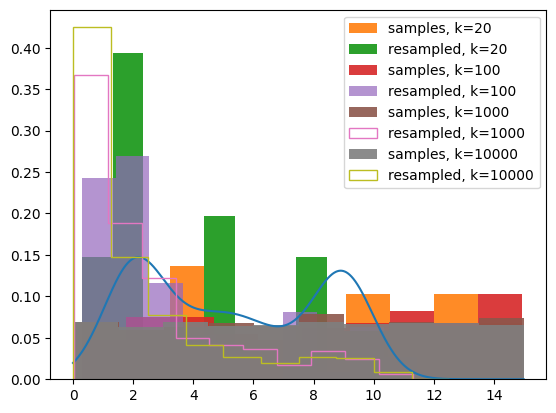

In [7]:
x = np.arange(0,15,0.01)
y = [p(idx) for idx in x]
plt.plot(x, y)

for alpha, histtype, k in zip((1,0.7,1, 1), ("bar","bar","step", "step"),(20,100,1000, 10000)):
    samples = gen_uniform_samples(k=k, seed=int(datetime.now().timestamp()))
    plt.hist(samples, density=True, label=f"samples, k={k}",alpha=0.9)
    resampled = resample(samples, k=k)
    print_distr(samples, normalize=True)
    rd = print_distr(resampled, normalize=True)
    plt.hist(resampled, density=True, label=f"resampled, k={k}", histtype=histtype, alpha=alpha)

plt.legend()
plt.show()